Customers Analysis:

1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

2. Does the high frequent customers are contributing more revenue

3. Are they also profitable - what is the profit margin across the buckets

4. Which customer segment is most profitable in each year ( there is a column called customer segment)

5. How the customers are distributed across the region - pie chart

6. Write a function to split the global store data into different unique data frames based on the unique values in country column [Means, we should have one data frame for one country as function output ]

In [ ]:
#importing all libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sample - Superstore.csv to Sample - Superstore.csv


Here I have done data understanding using the basic fuctions 

In [ ]:
df = pd.read_csv('Sample - Superstore.csv',encoding='windows-1252')

In [ ]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Here we can see there are many parameters and hence for better analysis we will try to bifercate them and understand the importance 

In [ ]:

# Here we can see that there is negetive trend in profit
# in sales  data is either right skewed or there are too many outliers
# the discount falls in the range of 75% - 100%

df.describe()


Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [ ]:
#getting the null values if any 
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


  Getting the best selling products for us so we can market them.

In [ ]:
# for better analysis 
data = df

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data = data.set_index('Order Date')
data = data.sort_values(by='Order Date', ascending=True)
data.head()


Row ID        Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                                  
2014-01-03    7981  CA-2014-103800   1/7/2014  Standard Class    DP-13000   
2014-01-04     740  CA-2014-112326   1/8/2014  Standard Class    PO-19195   
2014-01-04     741  CA-2014-112326   1/8/2014  Standard Class    PO-19195   
2014-01-04     742  CA-2014-112326   1/8/2014  Standard Class    PO-19195   
2014-01-05    1760  CA-2014-141817  1/12/2014  Standard Class    MB-18085   

            Customer Name      Segment        Country          City  \
Order Date                                                            
2014-01-03  Darren Powers     Consumer  United States       Houston   
2014-01-04  Phillina Ober  Home Office  United States    Naperville   
2014-01-04  Phillina Ober  Home Office  United States    Naperville   
2014-01-04  Phillina Ober  Home Office  United States    Naperville   
2014-01-05     Mick Brown     Consumer  United States  Philadelphia   

                   State  Postal Code   Region       Product ID  \
Order Date                                                        
2014-01-03         Texas        77095  Central  OFF-PA-10000174   
2014-01-04      Illinois        60540  Central  OFF-LA-10003223   
2014-01-04      Illinois        60540  Central  OFF-ST-10002743   
2014-01-04      Illinois        60540  Central  OFF-BI-10004094   
2014-01-05  Pennsylvania        19143     East  OFF-AR-10003478   

                   Category Sub-Category  \
Order Date                                 
2014-01-03  Office Supplies        Paper   
2014-01-04  Office Supplies       Labels   
2014-01-04  Office Supplies      Storage   
2014-01-04  Office Supplies      Binders   
2014-01-05  Office Supplies          Art   

                                                 Product Name    Sales  \
Order Date                                                               
2014-01-03  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448   
2014-01-04                                          Avery 508   11.784   
2014-01-04                      SAFCO Boltless Steel Shelving  272.736   
2014-01-04         GBC Standard Plastic Binding Systems Combs    3.540   
2014-01-05  Avery Hi-Liter EverBold Pen Style Fluorescent ...   19.536   

            Quantity  Discount   Profit  
Order Date                               
2014-01-03         2       0.2   5.5512  
2014-01-04         3       0.2   4.2717  
2014-01-04         3       0.2 -64.7748  
2014-01-04         2       0.8  -5.4870  
2014-01-05         3       0.2   4.8840

#Getting the trendline 

(array([735234., 735415., 735599., 735780., 735964., 736146., 736330.,
        736511., 736695.]), <a list of 9 Text major ticklabel objects>)

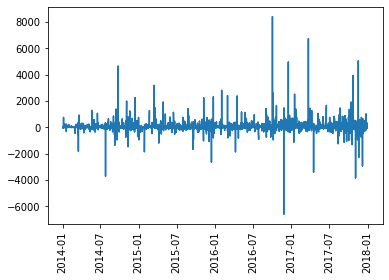

In [ ]:
plt.plot(data.Profit)
plt.xticks(rotation = 90)

####Here we can see that there is no trend in our Data which is not good from the company point of veiw


In [ ]:

product = data.groupby('Product Name').resample('A').sum()
product = product.sort_values(by='Quantity', ascending=False)
product = product['Quantity'][:50]
product




Product Name                                                                    Order Date
Staples                                                                         2017-12-31    68
Easy-staple paper                                                               2017-12-31    58
Staples                                                                         2016-12-31    56
Staple envelope                                                                 2014-12-31    54
Staples in misc. colors                                                         2017-12-31    52
Staples                                                                         2014-12-31    52
Staple envelope                                                                 2015-12-31    43
                                                                                2017-12-31    39
Staples                                                                         2015-12-31    39
Chromcraft Round Conference Tables  

In [ ]:
sector = data.groupby('Country').resample('A').sum()
sector = sector.sort_values(by='Profit', ascending=False)

sector = sector['Profit'][:120]
sector.head()

Country        Order Date
United States  2017-12-31    93439.2696
               2016-12-31    81795.1743
               2015-12-31    61618.6037
               2014-12-31    49543.9741
Name: Profit, dtype: float64

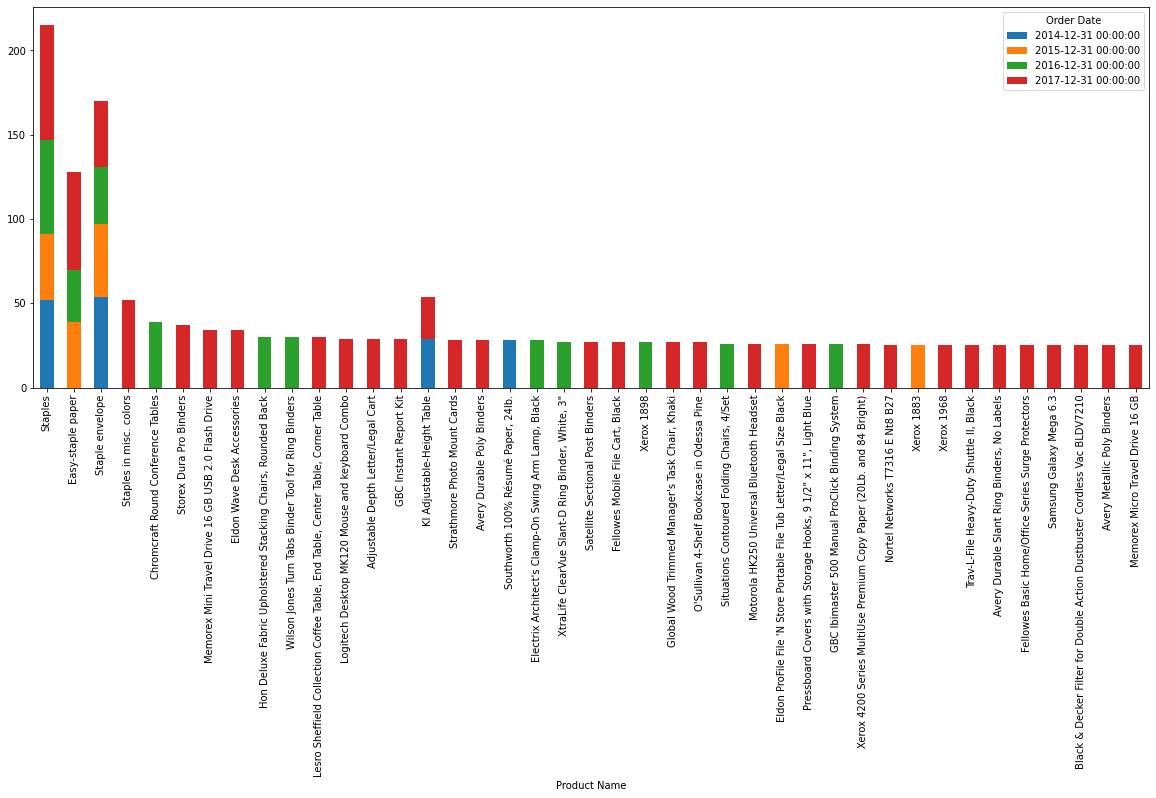

In [ ]:
product.unstack().plot(kind='bar', stacked=True, figsize=(20,7))

Staples are the company's best seller according to the graph over the past years. Further analysis shows that it is the only product whose numbers have been consistent over the years.

New products are outselling the total sales of the old products. Perhaps the old products have been discontinued or are at the end of their life cycle.
Products don't seem to last very long. i.e. They do not sell consistently for more than two years

In [ ]:
# purchase frequency = no of orders / no of unique customers (365 days)
# df['Order ID'].groupby('Customer ID').count()
df_customer = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']]
# .drop_duplicates()
df_customer.count()

Customer ID    9994
Order ID       9994
Order Date     9994
Ship Date      9994
Ship Mode      9994
Country        9994
dtype: int64

In [ ]:
# Here I have analysed the total number of unique costomer we have in the company 
df_customer1 = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']].drop_duplicates()
df_customer1.count()

Customer ID    5009
Order ID       5009
Order Date     5009
Ship Date      5009
Ship Mode      5009
Country        5009
dtype: int64

In [ ]:
df_customer1['Customer ID'].nunique()
# there are only 793 unique customer ids out of 25754 rows in the customer data

793

In [ ]:
# for understading each coustomer as the number 
def new_features(x):
    d = []
    d.append(x['Order ID'].nunique())
    d.append(x['Sales'].sum())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['City'].nunique())
    return pd.Series(d, index=['Purchases','Total_Sales','First_Purchase_Date','Latest_Purchase_Date','Location_Count'])

df_customer_new = df.groupby('Customer ID').apply(new_features)


In [ ]:

df_customer_new.head()

Purchases  Total_Sales First_Purchase_Date Latest_Purchase_Date  \
Customer ID                                                                    
AA-10315             5     5563.560          2014-03-31           2017-06-29   
AA-10375             9     1056.390          2014-04-21           2017-12-11   
AA-10480             4     1790.512          2014-05-04           2017-04-15   
AA-10645             6     5086.935          2014-06-22           2017-11-05   
AB-10015             3      886.156          2014-02-18           2016-11-10   

             Location_Count  
Customer ID                  
AA-10315                  4  
AA-10375                  9  
AA-10480                  4  
AA-10645                  6  
AB-10015                  3

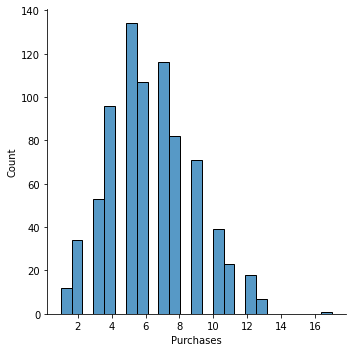

In [ ]:
# I will see the distribution of purchases of all the costomers 
sns.displot(df_customer_new.Purchases)

Here we can see the data is normally distributed Hence this can be used for forecasting future purchases of the permanent coustomer


2.Are the high frequent customers contributing more revenue



In [ ]:
from datetime import datetime
df_customer_new['Duration'] = (df_customer_new['Latest_Purchase_Date'] - df_customer_new['First_Purchase_Date']).dt.days


In [ ]:
df_customer_new['Frequency'] = df_customer_new['Duration']/df_customer_new['Purchases']
df_customer_new['Frequency'].head()

Customer ID
AA-10315    237.200000
AA-10375    147.777778
AA-10480    269.250000
AA-10645    205.333333
AB-10015    332.000000
Name: Frequency, dtype: float64

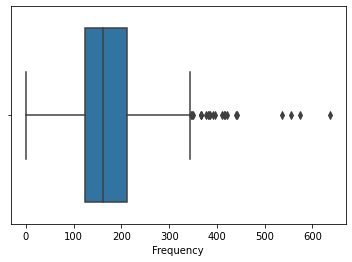

In [ ]:
#see the distrfibution of 
sns.boxplot(x = df_customer_new['Frequency'])

In [ ]:
# bucketing continuous data
def freq(x):
    if x < 150:
        return 'Low' 
    elif x < 350:
        return 'Mid' 
    else:
        return 'High'

df_customer_new['freq_range'] = df_customer_new.Frequency.apply(freq)

df_customer_new['freq_range'].value_counts()

Mid     426
Low     347
High     20
Name: freq_range, dtype: int64

In [ ]:
result = df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)

In [ ]:
# revenue = purchases * total sales of a costomer 
df_customer_new['Revenue'] = df_customer_new['Purchases'] *  df_customer_new['Total_Sales']

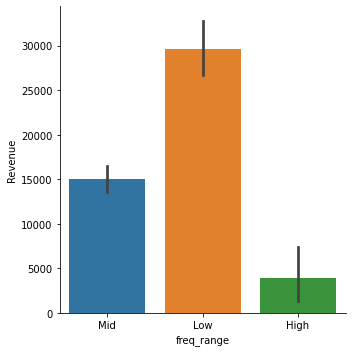

In [ ]:
sns.catplot(x="freq_range", y="Revenue", kind="bar", data=df_customer_new);

From the graph we can see that the high frequent customers are contrinuting less

Are they also profitable - what is the profit margin across the buckets

 4. Which customer segment is most profitable in each year ( there is a column called customer segment

In [ ]:
df.Segment.value_counts()





Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

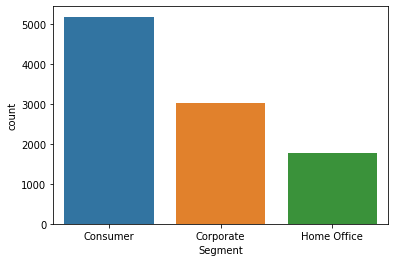

In [ ]:
sns.countplot(x="Segment",data = df)


 5. How the customers are distributed across the countries - pie chart 

In [ ]:
customer_country = pd.DataFrame({'Count' : df.groupby(["Region"]).size()}).reset_index().sort_values('Count',ascending = False).head(10)

In [ ]:
customer_country

Region  Count
3     West   3203
1     East   2848
0  Central   2323
2    South   1620

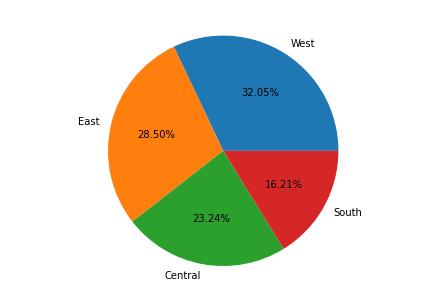

In [ ]:


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Countries = customer_country['Region']
cust_count = customer_country['Count']
ax.pie(cust_count, labels = Countries,autopct='%1.2f%%')
plt.show()

Here I can see an equal distribution of customers Though the south lags 